```
General Flow

load
clean data
explore
feature engineer?
split - train + test
build model
    - classification: logistic regression, KNN
```

# Loading

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 20)

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import preprocessing, linear_model, cross_validation, metrics

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(os.path.join('.', 'dataset-12-walget-train.csv'))

In [3]:
df

,AccountHolderImpliedGender,AccountHolderAddress,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,RecentlyPurchasedFolicAcidSupplements,RecentlyPurchasedPrenatalVitamins,RecentlyPurchasedPrenatalYogaDVD,RecentlyPurchasedBodyPillow,RecentlyPurchasedGingerAle,RecentlyPurchasedSeaBands,PurchasedCigarettesRegularlyUntilRecentlyThenStopped,RecentlyPurchasedCigarettes,RecentlyPurchasedSmokingCessationProducts,PurchasedWineRegularlyUntilRecentlyThenStopped,RecentlyPurchasedWine,RecentlyPurchasedMaternityClothing,IsPregnant
0,Female,Apartment,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Male,Apartment,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False
2,Male,Apartment,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Male,Apartment,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,Male,Apartment,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
5,Male,Apartment,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
6,Male,Apartment,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,Female,Home,False,True,False,False,False,False,False,False,False,NaN,False,False,False,True,False,False
8,Female,Apartment,False,False,False,False,False,False,False,False,NaN,False,True,False,True,False,False,False
9,Male,Apartment,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.columns

Index([u'AccountHolderImpliedGender', u'AccountHolderAddress',
       u'RecentlyPurchasedPregnancyTest', u'RecentlyPurchasedBirthControl',
       u'RecentlyPurchasedFeminineHygieneProducts',
       u'RecentlyPurchasedFolicAcidSupplements',
       u'RecentlyPurchasedPrenatalVitamins',
       u'RecentlyPurchasedPrenatalYogaDVD', u'RecentlyPurchasedBodyPillow',
       u'RecentlyPurchasedGingerAle', u'RecentlyPurchasedSeaBands',
       u'PurchasedCigarettesRegularlyUntilRecentlyThenStopped',
       u'RecentlyPurchasedCigarettes',
       u'RecentlyPurchasedSmokingCessationProducts',
       u'PurchasedWineRegularlyUntilRecentlyThenStopped',
       u'RecentlyPurchasedWine', u'RecentlyPurchasedMaternityClothing',
       u'IsPregnant'],
      dtype='object')

In [5]:
df.dtypes

AccountHolderImpliedGender                              object
AccountHolderAddress                                    object
RecentlyPurchasedPregnancyTest                          object
RecentlyPurchasedBirthControl                           object
RecentlyPurchasedFeminineHygieneProducts                object
RecentlyPurchasedFolicAcidSupplements                   object
RecentlyPurchasedPrenatalVitamins                       object
RecentlyPurchasedPrenatalYogaDVD                        object
RecentlyPurchasedBodyPillow                             object
RecentlyPurchasedGingerAle                              object
RecentlyPurchasedSeaBands                               object
PurchasedCigarettesRegularlyUntilRecentlyThenStopped    object
RecentlyPurchasedCigarettes                             object
RecentlyPurchasedSmokingCessationProducts               object
PurchasedWineRegularlyUntilRecentlyThenStopped          object
RecentlyPurchasedWine                                  

# Cleaning

In [6]:
df.isnull().sum()

AccountHolderImpliedGender                              58
AccountHolderAddress                                     6
RecentlyPurchasedPregnancyTest                           6
RecentlyPurchasedBirthControl                            7
RecentlyPurchasedFeminineHygieneProducts                10
RecentlyPurchasedFolicAcidSupplements                    1
RecentlyPurchasedPrenatalVitamins                        6
RecentlyPurchasedPrenatalYogaDVD                         6
RecentlyPurchasedBodyPillow                              9
RecentlyPurchasedGingerAle                               6
RecentlyPurchasedSeaBands                               11
PurchasedCigarettesRegularlyUntilRecentlyThenStopped     5
RecentlyPurchasedCigarettes                              9
RecentlyPurchasedSmokingCessationProducts               12
PurchasedWineRegularlyUntilRecentlyThenStopped          12
RecentlyPurchasedWine                                    8
RecentlyPurchasedMaternityClothing                      

In [7]:
# temp - drop all rows which have na values
# future - maybe some rows are worth holding on to -- e.g. impliedGender

df = df.dropna()
df.shape

(446, 18)

In [8]:
df.describe()

,AccountHolderImpliedGender,AccountHolderAddress,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,RecentlyPurchasedFolicAcidSupplements,RecentlyPurchasedPrenatalVitamins,RecentlyPurchasedPrenatalYogaDVD,RecentlyPurchasedBodyPillow,RecentlyPurchasedGingerAle,RecentlyPurchasedSeaBands,PurchasedCigarettesRegularlyUntilRecentlyThenStopped,RecentlyPurchasedCigarettes,RecentlyPurchasedSmokingCessationProducts,PurchasedWineRegularlyUntilRecentlyThenStopped,RecentlyPurchasedWine,RecentlyPurchasedMaternityClothing,IsPregnant
count,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446,446
unique,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Female,Home,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,252,225,411,386,378,399,384,437,439,417,431,407,394,414,390,397,380,224


In [9]:
# make true and false 0 or 1
df = df * 1
df

,AccountHolderImpliedGender,AccountHolderAddress,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,RecentlyPurchasedFolicAcidSupplements,RecentlyPurchasedPrenatalVitamins,RecentlyPurchasedPrenatalYogaDVD,RecentlyPurchasedBodyPillow,RecentlyPurchasedGingerAle,RecentlyPurchasedSeaBands,PurchasedCigarettesRegularlyUntilRecentlyThenStopped,RecentlyPurchasedCigarettes,RecentlyPurchasedSmokingCessationProducts,PurchasedWineRegularlyUntilRecentlyThenStopped,RecentlyPurchasedWine,RecentlyPurchasedMaternityClothing,IsPregnant
0,Female,Apartment,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Male,Apartment,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
2,Male,Apartment,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Male,Apartment,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Male,Apartment,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Male,Apartment,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,Male,Apartment,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Male,Apartment,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,Male,Home,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
11,Male,Home,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# set gender column to 1 for female, 0 for male
df.AccountHolderImpliedGender = df.AccountHolderImpliedGender.apply(lambda value: 1 if value == 'Female' else 0)
df

,AccountHolderImpliedGender,AccountHolderAddress,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,RecentlyPurchasedFolicAcidSupplements,RecentlyPurchasedPrenatalVitamins,RecentlyPurchasedPrenatalYogaDVD,RecentlyPurchasedBodyPillow,RecentlyPurchasedGingerAle,RecentlyPurchasedSeaBands,PurchasedCigarettesRegularlyUntilRecentlyThenStopped,RecentlyPurchasedCigarettes,RecentlyPurchasedSmokingCessationProducts,PurchasedWineRegularlyUntilRecentlyThenStopped,RecentlyPurchasedWine,RecentlyPurchasedMaternityClothing,IsPregnant
0,1,Apartment,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,Apartment,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
2,0,Apartment,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,Apartment,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,Apartment,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,Apartment,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,Apartment,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,Apartment,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,0,Home,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
11,0,Home,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
addresses = pd.get_dummies(df.AccountHolderAddress, prefix='AddressType')

In [12]:
df.drop('AccountHolderAddress', axis=1, inplace=True)
df = df.join(addresses)

In [13]:
df

,AccountHolderImpliedGender,RecentlyPurchasedPregnancyTest,RecentlyPurchasedBirthControl,RecentlyPurchasedFeminineHygieneProducts,RecentlyPurchasedFolicAcidSupplements,RecentlyPurchasedPrenatalVitamins,RecentlyPurchasedPrenatalYogaDVD,RecentlyPurchasedBodyPillow,RecentlyPurchasedGingerAle,RecentlyPurchasedSeaBands,PurchasedCigarettesRegularlyUntilRecentlyThenStopped,RecentlyPurchasedCigarettes,RecentlyPurchasedSmokingCessationProducts,PurchasedWineRegularlyUntilRecentlyThenStopped,RecentlyPurchasedWine,RecentlyPurchasedMaternityClothing,IsPregnant,AddressType_Apartment,AddressType_Home,AddressType_PO Box
0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# Explore the data

In [14]:
df.corr().IsPregnant.sort_values(ascending=False)

IsPregnant                    1.000000
AccountHolderImpliedGender    0.131748
AddressType_Home              0.053855
AddressType_PO Box            0.009061
AddressType_Apartment        -0.060445
Name: IsPregnant, dtype: float64

In [15]:
df.describe()

,AccountHolderImpliedGender,IsPregnant,AddressType_Apartment,AddressType_Home,AddressType_PO Box
count,446.000000,446.000000,446.000000,446.000000,446.000000
mean,0.565022,0.497758,0.399103,0.504484,0.096413
std,0.496311,0.500556,0.490264,0.500541,0.295488
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


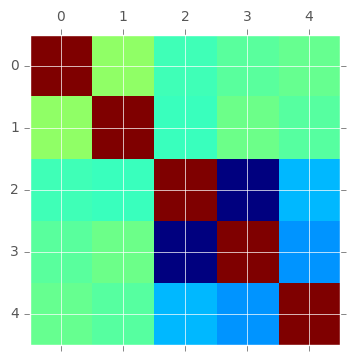

In [16]:
plt.matshow(df.corr())

# Building a model

In [17]:
# See what we get with simple train set, without splitting train / test

X = df.drop('IsPregnant', axis=1)
c = df.IsPregnant

model = linear_model.LogisticRegression().fit(X, c)
model.score(X, c)

0.87219730941704032

In [18]:
# ok, separating training and test set...

def split_and_test(df):
    train_df = df.sample(frac = .6, random_state = 0)
    test_df = df.drop(train_df.index)

    X = train_df.drop('IsPregnant', axis=1)
    c = train_df.IsPregnant

    model = linear_model.LogisticRegression().fit(X, c)

    X_test = test_df.drop('IsPregnant', axis=1)
    c_test = test_df.IsPregnant

    print('train: ' + str(model.score(X, c)))
    print('test: ' + str(model.score(X_test, c_test)))
    
split_and_test(df)

train: 0.880597014925
test: 0.842696629213


In [19]:
# removing all the men from the model doesn't change our score

da_men = df.loc[df.AccountHolderImpliedGender == 0]
df_women = df.drop(da_men.index)

split_and_test(df_women)

train: 0.880794701987
test: 0.831683168317


In [20]:
# aggregate purchases into a single count

df_summed = df[['AccountHolderImpliedGender', 'IsPregnant']]
# add the "good" purchases -- note, ignoring wine and cigarettes recently purchased
df_summed['PuchaseSum'] = df[[
    u'RecentlyPurchasedPregnancyTest',
    u'RecentlyPurchasedBirthControl',
    u'RecentlyPurchasedFeminineHygieneProducts',
    u'RecentlyPurchasedFolicAcidSupplements',
    u'RecentlyPurchasedPrenatalVitamins',
    u'RecentlyPurchasedPrenatalYogaDVD',
    u'RecentlyPurchasedBodyPillow',
    u'RecentlyPurchasedGingerAle', 
    u'RecentlyPurchasedSeaBands',
    u'PurchasedCigarettesRegularlyUntilRecentlyThenStopped',
    u'RecentlyPurchasedSmokingCessationProducts',
    u'PurchasedWineRegularlyUntilRecentlyThenStopped',
    u'RecentlyPurchasedMaternityClothing'
]].sum(axis = 1)
# todo - might make sense to subtract wine and cigarettes... but becomes clear this is not helpful
df_summed

/Users/maxwellbates/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,AccountHolderImpliedGender,IsPregnant,PuchaseSum
0,1,0,1.0
1,0,0,1.0
2,0,0,0.0
3,0,0,0.0
4,0,0,1.0
5,0,0,0.0
6,0,0,0.0
9,0,0,0.0
10,0,0,1.0
11,0,0,1.0


In [21]:
# summing them up didn't help....

split_and_test(df_summed)

train: 0.708955223881
test: 0.668539325843


In [23]:
# just adding it as a column doesn't increase our score
df_sum_added = df[df.columns]
df_sum_added['Sum'] = df_summed['PuchaseSum']
split_and_test(df_sum_added)

train: 0.876865671642
test: 0.848314606742


In [24]:
# let's see what KNN looks like:

from sklearn import preprocessing, neighbors, grid_search

def do_KNN(df): 
    train_df = df.sample(frac = .6, random_state = 0)
    test_df = df.drop(train_df.index)

    train_X = train_df.drop('IsPregnant', axis=1)
    train_c = train_df.IsPregnant

    test_X = test_df.drop('IsPregnant', axis=1)
    test_c = test_df.IsPregnant

    # Do grid search to fit the same data for KNN
    k_cv = 5 # 10-fold CV
    k_nn = range(1, train_df.shape[0] * (k_cv - 1) / k_cv) # k-NN

    gs = grid_search.GridSearchCV(
        estimator = neighbors.KNeighborsClassifier(),
        param_grid = {'n_neighbors': k_nn},
        cv = cross_validation.KFold(train_df.shape[0], n_folds = k_cv)
    )

    gs.fit(train_X, train_c)
    
    print gs.best_score_
    print gs.best_params_
    print gs.best_estimator_
    
    knn_model = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform').fit(train_X, train_c)

    print 'training misclassification =', 1 - knn_model.score(train_X, train_c)
    print 'testing  misclassification =', 1 - knn_model.score(test_X, test_c)
    
do_KNN(df)

0.753731343284
{'n_neighbors': 3}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')
training misclassification = 0.19776119403
testing  misclassification = 0.342696629213
